### Spectrogram / Audio model

This notebook contains  code for the audio model. A model containing 3 Convolution
Neural Networks (CNNs) was used with account to limited compute in time of training.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import random_split, DataLoader

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

# consider adding a random seed for reproducibility

In [2]:
# augmentations to the data in a format that
# can be used by the model
transform = transforms.Compose([
    transforms.Resize(800),
    transforms.ToTensor(),
])

# create datasets
trainset = datasets.ImageFolder("../data/train/spectrograms/", transform=transform)
testset = datasets.ImageFolder("../data/test/spectrograms/", transform=transform)
validationset = datasets.ImageFolder("../data/validation/spectrograms/", transform=transform)

In [3]:
# data loaders
trainloader = DataLoader(trainset, batch_size=16)
testloader = DataLoader(testset, batch_size=16)
validationloader = DataLoader(validationset, batch_size=16)

In [4]:
# check if data is as expected
dataiter = iter(trainloader)
images, labels = dataiter.next()

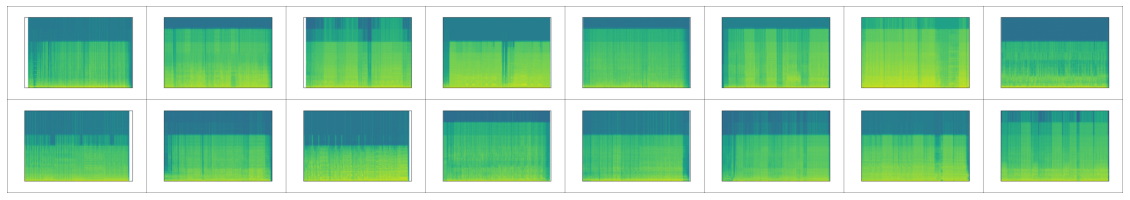

tensor([0, 0, 2, 1, 0, 1, 1, 3, 2, 1, 2, 1, 3, 0, 1, 0])


In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
plt.figure(figsize=(20, 20))
plt.axis('off')
imshow(torchvision.utils.make_grid(images))
print(labels)

# create a representation that shows the images and labels
# in one diagram.

In [6]:
"""

# TODO: Will using a smaller batch size allow me to train this model?
# TODO: Evaluate these models and also try using a pretrained model.

class AudioNN(nn.Module):
    def __init__(self):
        super(AudioNN, self).__init__()

        self.seq1 = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(6),
        )

        self.seq2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=(3, 3)),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(6),
        )

        self.dense1 = nn.Sequential(
            nn.Dropout(p=.5),
            nn.Linear(16 * 200 * 200, 2048),
        )

        self.dense2 = nn.Sequential(
            nn.Dropout(p=.5),
            nn.Linear(2048, 4)
        )

    def forward(self, x):
        x = self.seq1(x)
        x = self.seq2(x)
        x = Flatten.forward(x)
        x = self.dense1(x)
        x = self.dense2(x)

        return x


model = AudioNN()

"""


class Flatten(nn.Module):
    def forward(self, x):
#         print(x.shape)
        return x.view(x.size(0), -1)


model = nn.Sequential(
    nn.Conv2d(3, 8, 5),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(8, 16, 5),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 5),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 64, 5),
    nn.MaxPool2d(2, 2),
    Flatten(),
    nn.Linear(64 * 46 * 71, 1000),
    nn.ReLU(),
    nn.Linear(1000, 4)
)

model

Sequential(
  (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten()
  (9): Linear(in_features=209024, out_features=1000, bias=True)
  (10): ReLU()
  (11): Linear(in_features=1000, out_features=4, bias=True)
)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten()
  (9): Linear(in_features=102400, out_features=1000, bias=True)
  (10): ReLU()
  (11): Linear(in_features=1000, out_features=2, bias=True)
)

In [20]:
# Test out the randomly initialized model
x = images.to(device)
output = model(x)
_, pred= torch.max(output, dim=1)
print(f'Pred: {pred}')
print(f'Ground: {labels}')

Pred: tensor([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2])
Ground: tensor([1, 2, 3, 3, 2, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 2])


In [5]:
# initialize hyperparameters
epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [6]:
# TODO: this needs to be updated
for epoch in range(epochs):  # loop models/r the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step() # update

        # print statistics
        running_loss += loss.item()
        
        
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss))
        running_loss = 0.0

print('Finished Training')

[1,     1] loss: 1.377
[1,     2] loss: 1.247
[1,     3] loss: 1.450
[1,     4] loss: 1.264
[1,     5] loss: 1.360
[1,     6] loss: 1.401
[1,     7] loss: 1.542
[1,     8] loss: 1.310
[1,     9] loss: 1.392
[1,    10] loss: 1.336
[1,    11] loss: 1.488
[1,    12] loss: 1.414
[1,    13] loss: 1.368
[1,    14] loss: 1.386
[1,    15] loss: 1.394
[1,    16] loss: 1.374
[1,    17] loss: 1.357
[2,     1] loss: 1.339
[2,     2] loss: 1.326
[2,     3] loss: 1.385
[2,     4] loss: 1.331
[2,     5] loss: 1.336
[2,     6] loss: 1.354
[2,     7] loss: 1.384
[2,     8] loss: 1.340
[2,     9] loss: 1.383
[2,    10] loss: 1.261
[2,    11] loss: 1.623
[2,    12] loss: 1.529
[2,    13] loss: 1.301
[2,    14] loss: 1.263
[2,    15] loss: 1.451
[2,    16] loss: 1.315
[2,    17] loss: 1.218
[3,     1] loss: 1.241
[3,     2] loss: 1.239
[3,     3] loss: 1.397
[3,     4] loss: 1.295
[3,     5] loss: 1.328
[3,     6] loss: 1.358
[3,     7] loss: 1.386
[3,     8] loss: 1.354
[3,     9] loss: 1.374
[3,    10] 

In [8]:
# saving trained model weights
torch.save(model.state_dict(), 'model.0.02.pt')

NameError: name 'model' is not defined

In [7]:
# loading trained model weights for evaluation
model.load_state_dict(torch.load("model-0.0.2", map_location="cpu"), strict=False)
model.eval()

Sequential(
  (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten()
  (9): Linear(in_features=209024, out_features=1000, bias=True)
  (10): ReLU()
  (11): Linear(in_features=1000, out_features=4, bias=True)
)

In [8]:
# TODO: create a function for evaluataion
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [9]:
x = images
output = model(x)
_, pred= torch.max(output, dim=1)
print(f'Pred: {pred}')
print(f'Ground: {labels}')

Pred: tensor([0, 0, 2, 1, 3, 1, 1, 3, 2, 1, 2, 2, 3, 0, 0, 0])
Ground: tensor([0, 0, 2, 1, 0, 1, 1, 3, 2, 1, 2, 1, 3, 0, 1, 0])


In [14]:
# single input prediction
image  = Image.open("../data/train/spectrograms/0/254391.png").convert("RGB")
input = transform(image).unsqueeze(0)
output = model(input)

In [15]:
output

tensor([[ 2.3411, -0.8606,  0.3525, -1.8488]], grad_fn=<AddmmBackward>)

In [17]:
_, pred= torch.max(output, dim=1)
pred = pred.item() + 1
print(f"Prediction: Q{pred} \nLabel: Q1")

Prediction: Q1 
Label: Q1
